In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')


Plot the populations for the years in the period. Add legend and axis labels to the plot.




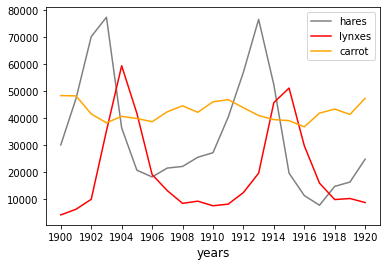

In [6]:
plt.plot(data[:, 0], data[:, 1], label='hares', color = 'gray')
plt.plot(data[:, 0], data[:, 2], label='lynxes', color = 'r')
plt.plot(data[:, 0], data[:, 3], label='carrot', c = 'orange')
plt.xlabel('years', fontsize=12)
plt.xticks( data[:, 0][::2])
plt.legend()
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

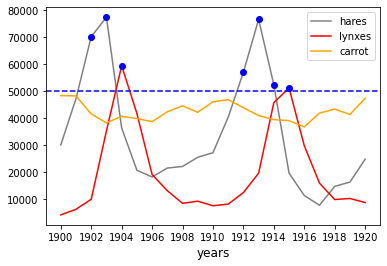

In [7]:
dm5 =data[:,1:] > 50000
plt.plot(data[:, 0], data[:, 1], label='hares', color = 'gray')
plt.plot(data[:, 0], data[:, 2], label='lynxes', color = 'r')
plt.plot(data[:, 0], data[:, 3], label='carrot', c = 'orange')
plt.plot(data[dm5[:,0],0], data[dm5[:,0],1] , 'bo')
plt.plot(data[dm5[:,1],0], data[dm5[:,1],2] , 'bo')
plt.plot(data[dm5[:,2],0], data[dm5[:,2],3] , 'bo')
plt.axhline(y = 50000, color = 'b', linestyle = '--')
plt.xlabel('years', fontsize=12)
plt.xticks( data[:, 0][::2])
plt.legend()
plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

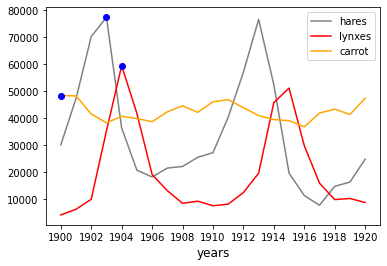

In [8]:
dmax = data[:,1:].argmax(axis = 0)
plt.plot(data[:, 0], data[:, 1], label='hares', color = 'gray')
plt.plot(data[:, 0], data[:, 2], label='lynxes', color = 'r')
plt.plot(data[:, 0], data[:, 3], label='carrot', c = 'orange')
plt.plot(data[dmax[0],0], data[dmax[0],1] , 'bo')
plt.plot(data[dmax[1],0], data[dmax[1],2] , 'bo')
plt.plot(data[dmax[2],0], data[dmax[2],3] , 'bo')
plt.xlabel('years', fontsize=12)
plt.xticks( data[:, 0][::2])
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

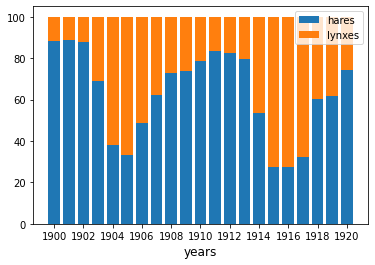

In [9]:
total = data[:, 1] + data[:, 2]
plt.bar(data[:, 0], 100*data[:,1]/total, label='hares')
plt.bar(data[:, 0], 100*data[:,2]/total, label='lynxes', bottom = 100*data[:,1]/(data[:,1]+data[:,2]) )
plt.xlabel('years', fontsize=12)
plt.xticks( data[:, 0][::2])
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

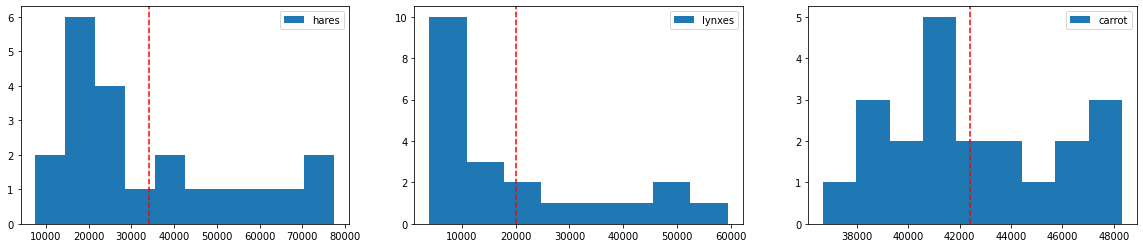

In [94]:
dmean = np.mean(data[:,1:], axis = 0)
fig, gr = plt.subplots(1, 3, figsize=(20,4))
gr[0].hist(data[:, 1], label='hares',bins = 10)
gr[1].hist(data[:, 2], bins = 8, label='lynxes')
gr[2].hist(data[:, 3], bins = 9, label='carrot')
gr[0].axvline(x = dmean[0], color = 'red', linestyle = '--')
gr[1].axvline(x = dmean[1], color = 'red', linestyle = '--')
gr[2].axvline(x = dmean[2], color = 'red', linestyle = '--')
gr[0].legend() 
gr[1].legend()
gr[2].legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


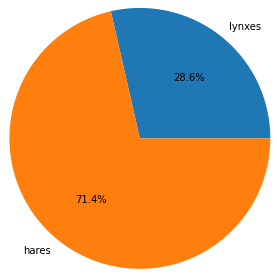

In [70]:
L_amount = np.sum(data[:,1:-1].argmax(axis = 1))/np.size(data[:,1:-1].argmax(axis = 1))*100
H_amount = 100 - L_amount
print(np.array(['H', 'L'])[data[:,1:-1].argmax(axis = 1)])
plt.pie([L_amount, H_amount], labels=['lynxes', 'hares'], autopct='%1.1f%%', radius = 1.5)
plt.show()

Plot the change in the hare population and the number of lynxes. Find the correlation coefficient.

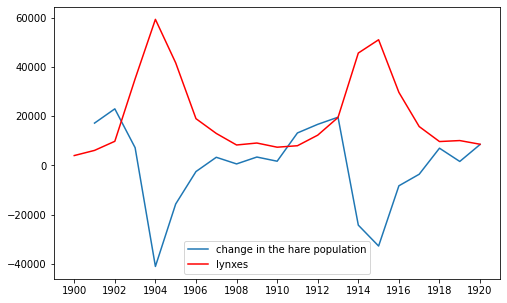

array([[ 1.        , -0.69334852],
       [-0.69334852,  1.        ]])

In [104]:
plt.figure(figsize=(8,5))
plt.plot(data[1:, 0], data[1:, 1]-data[:-1, 1], label = 'change in the hare population')
plt.plot(data[:, 0], data[:, 2], label='lynxes', color = 'r')
plt.xticks( data[:, 0][::2])
plt.legend()
plt.show()

np.corrcoef(data[:-1, 2], data[1:, 1]-data[:-1, 1])

Using a scatter plot, show the population of hares vs carrots and hares vs lynxes by year on two separate subplots (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

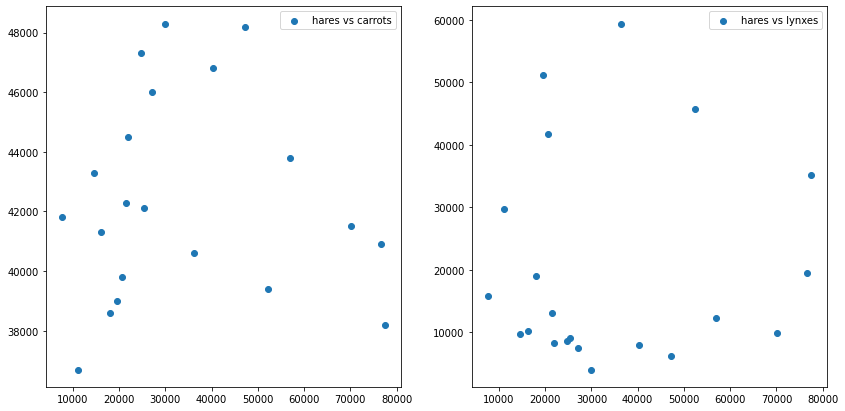

In [118]:
fig, gr = plt.subplots(1, 2, figsize=(14,7))
gr[0].scatter(data[:, 1], data[:, 3], label = 'hares vs carrots')
gr[1].scatter(data[:, 1], data[:, 2], label = 'hares vs lynxes')
gr[0].legend()
gr[1].legend()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [151]:
corr_HL = np.corrcoef(data[:-1, 2], data[1:, 1]-data[:-1, 1])
corr_HC = np.corrcoef(data[:-1, 3], data[1:, 1]-data[:-1, 1])
ratio_L = data[19, 2]/data[18,2]
ratio_C = data[19, 3]/data[18,3]
h_20 = (data[19, 1]*(ratio_L * corr_HL[0, 1]*np.sign(corr_HL[0, 1]) + ratio_C * corr_HC[0, 1]*np.sign(corr_HC[0, 1])))
print("estimated value = ", round(h_20))
print("ratio of the error = ", (data[20, 1] -round(h_20))/data[20, 1]*100)

estimated value =  22493
ratio of the error =  8.935222672064777
